<a href="https://colab.research.google.com/github/motokikando/sentiment_analysis/blob/main/time_series_analysis02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# MeCabのインストール
!apt install mecab libmecab-dev mecab-ipadic-utf8
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-jumandic
  mecab-jumandic-utf8 mecab-utils
0 upgraded, 8 newly installed, 0 to remove and 37 not upgraded.
Need to get 29.0 MB of archives.
After this operation, 277 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab2 amd64 0.996-5 [257 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmecab-dev amd64 0.996-5 [308 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-utils amd64 0.996-5 [4,856 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-4 [16.2 MB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/universe amd6

In [ ]:
# 感情分析のためのライブラリ
!pip install asari
!pip install Janome==0.3.7

     |████████████████████████████████| 10.4 MB 4.8 MB/s 
     |████████████████████████████████| 19.7 MB 7.1 MB/s 
     |████████████████████████████████| 20.7 MB 1.6 MB/s 
  Attempting uninstall: Janome
    Found existing installation: Janome 0.4.1
    Uninstalling Janome-0.4.1:
      Successfully uninstalled Janome-0.4.1


In [ ]:
# シンプルな動作確認
from asari.api import Sonar
sonar = Sonar()
res = sonar.ping("最近1000円拾った")
res 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator _SigmoidCalibration from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CalibratedClassifierCV from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid 

{'classes': [{'class_name': 'negative', 'confidence': 0.37997476997327634},
  {'class_name': 'positive', 'confidence': 0.6200252300267236}],
 'text': '最近1000円拾った',
 'top_class': 'positive'}

# 時系列感情分析


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LinearSVC from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator _SigmoidCalibration from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CalibratedClassifierCV from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid 

sosotakei
[[1459776287065530375, datetime.datetime(2021, 11, 14, 6, 52, 42), '末期がんの父と思い出ドライブトーク１８時公開序盤、音声乱れてますがすぐおさまるので我慢してね！ https://t.co/PyKtr6SxnA @YouTubeより', 0.052754094387122606, 0.9472459056128774], [1459761443302101000, datetime.datetime(2021, 11, 14, 5, 53, 43), '誰か今からゴルフ練習して明日ラウンドしたい人募集中。。', 0.2594675597530926, 0.7405324402469075], [1459761001641885703, datetime.datetime(2021, 11, 14, 5, 51, 58), 'すっごい分析されとる箕輪くんの言語化力ね【武井壮】覚悟を決めた男を徹底解剖してみた。 https://t.co/AI9dtiAGJQ @YouTube', 0.3744518085270938, 0.6255481914729062], [1459744866066329603, datetime.datetime(2021, 11, 14, 4, 47, 51), 'EDO ALL UNITED東京都3部リーグの昇格トーナメント初戦に2-1で勝利！！あとひとつ！！がんばれ！！ https://t.co/HrmSwZzBxh', 0.06985039161821505, 0.930149608381785], [1459520926395949060, datetime.datetime(2021, 11, 13, 13, 58), 'Twitterエゴサ復活おめ', 0.05322084369613378, 0.9467791563038662], [1459206266123816961, datetime.datetime(2021, 11, 12, 17, 7, 39), '久々のライブやで！寄ってって！ https://t.co/vAAqAnsUlm @YouTube', 0.10515464824666847, 0.8948453517533315

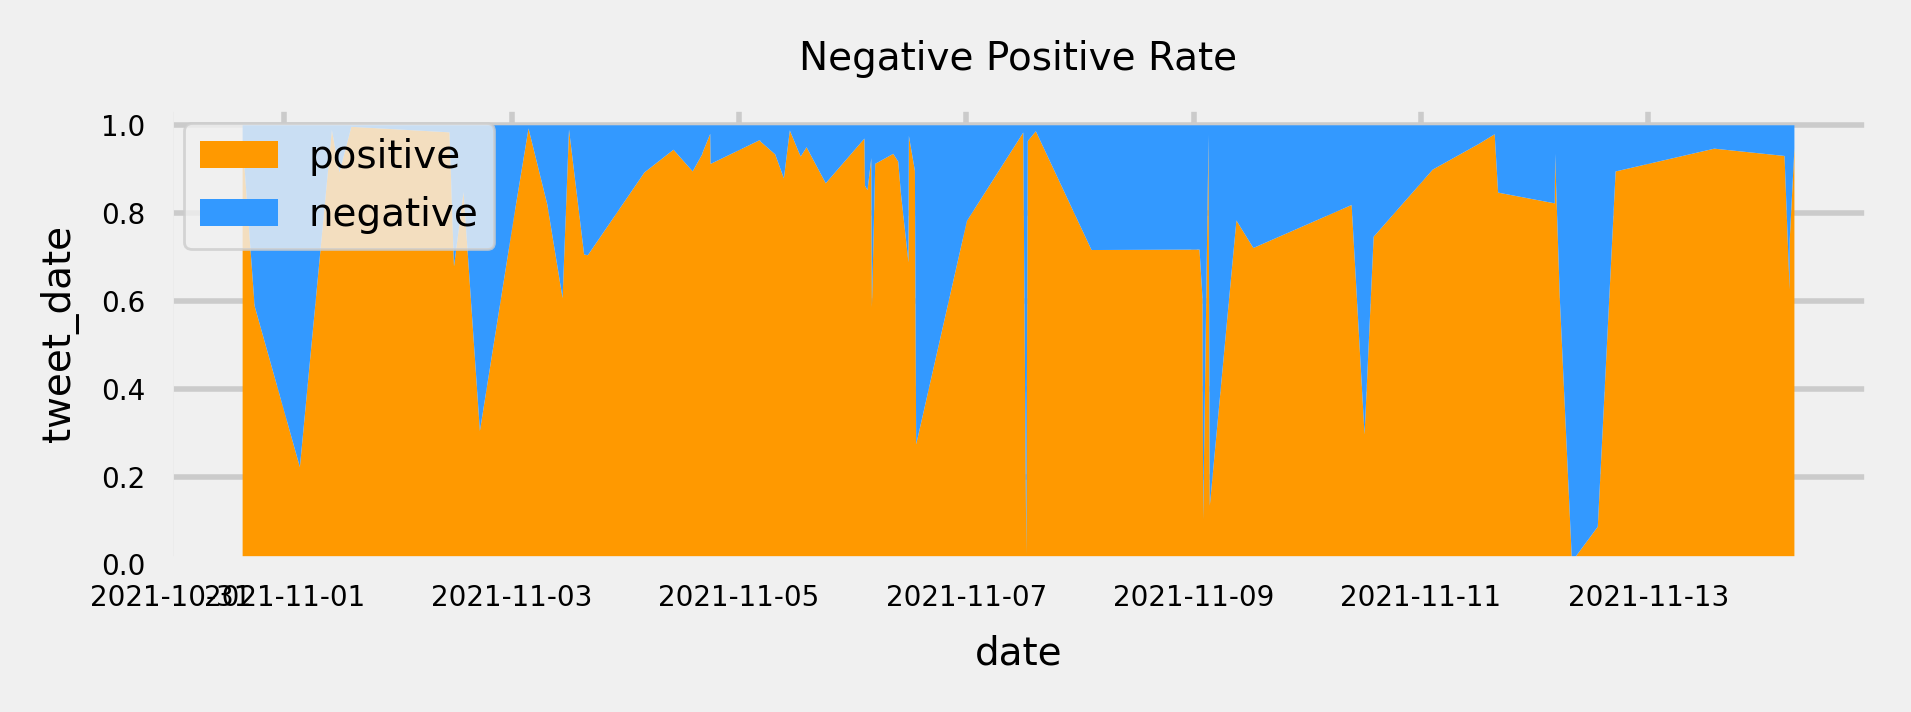

end


In [ ]:
import tweepy
import pandas as pd
import datetime
import pprint
from asari.api import Sonar
from matplotlib import pyplot as plt


# TweepyAPI KEY
CONSUMER_KEY = 'IDDNfmSrTTET17mQiu8zXfw8D'
CONSUMER_SECRET = 'DlenG1gwViLVYJFVsy0b04KzoCqeKWv9YXNo6SBcHxxtwHo1YA'
ACCESS_TOKEN = '840196801344946176-qCCNjTHJnhy6mkKemYw3g5kMkdjPV1g'
ACCESS_TOKEN_SECRET = 'OtHdLWe1izqULT16STCqqRWOST4aUL23hyycbna718FXn'


#tweepyの設定
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
api = tweepy.API(auth)
columns_name=["id","tweet_time","text", "negative", "positive"]


def get_tweets():
    tweet_data = []
    sonar = Sonar()
    tw_id = input() #twitter_id入力　
    #ツイート取得
    for tweet in tweepy.Cursor(api.user_timeline,screen_name = tw_id, exclude_replies = True).items(100):
      if (list(tweet.text)[:2]!=['R', 'T']) & (list(tweet.text)[0]!='@'): #リツイートを除外
        tweet_data.append([tweet.id,tweet.created_at,tweet.text.replace('\n','')]) #id, 日時, textを格納 
    
    #asari分析
    for i in range(len(tweet_data)):
      d = sonar.ping(tweet_data[i][2])

      #ネガポジdictの格納
      negative = d['classes'][0]
      positive = d['classes'][1]
      tweet_data[i].append(negative['confidence']) #negative%を取得しtweet_dataに格納
      tweet_data[i].append(positive['confidence']) #positive%を取得しtweet_dataに格納
    # print(tweet_data)

    #データフレームに格納
    df = pd.DataFrame(tweet_data,columns=columns_name)
    df = df.sort_values('tweet_time', ascending=True)

    #ネガティブスコア、ポジティブスコア、ツイート日時をリスト型に変換
    negative = df['negative'].tolist()
    positive = df['positive'].tolist()
    tweet_time = df['tweet_time'].tolist()

    #時系列ネガポジグラフ表示
    plt.style.use("fivethirtyeight")
    labels = ['positive','negative']
    colors = ['#FF9900','#3399FF']
    plt.figure(figsize=(5, 2), dpi=400)
    plt.stackplot(tweet_time, positive, negative, labels=labels, colors=colors)
    plt.xlabel('date', fontsize=7)
    plt.ylabel('tweet_date',fontsize=7)
    plt.legend(loc='upper left',fontsize=7)
    plt.title('Negative Positive Rate',fontsize=7)
    plt.tick_params(labelsize=5)
    plt.tight_layout()
    plt.show()
    print("end")

get_tweets()